<a href="https://colab.research.google.com/github/guangyitan/Udemy-Unsupervised-Machine-Learning-with-2-Capstone-ML-Projects/blob/main/Section%203/Optimizing_Crop_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import ipywidgets
from ipywidgets import interact


In [2]:
# mount to google drive
from google.colab import drive 
drive.mount('/content/MyDrive')
project_path = '/content/MyDrive/My Drive/Colab Notebooks/Udemy/Optimizing Crop Production/'

# read the excel file
# the dataset can be obtained from https://www.kaggle.com/atharvaingle/crop-recommendation-dataset
data = pd.read_csv(project_path + "crop_recommendation_dataset.csv")
data.shape

Mounted at /content/MyDrive


(2200, 8)

# Aim of Project
We need to train a model that can predict suitable crops that can be planted based on the given soil condition

In [3]:
# Visualise the dataset
# set num  of columns to display
pd.set_option('max_columns', 8)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# check for Missing values in the dataset
print(data.isnull().sum())
print("There are no missing value in the dataset")

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
There are no missing value in the dataset


In [5]:
# check the crops present in this dataset
print(data['label'].value_counts())

print("Number of classes: ", data['label'].nunique())

jute           100
pomegranate    100
rice           100
blackgram      100
mungbean       100
papaya         100
apple          100
pigeonpeas     100
coffee         100
banana         100
muskmelon      100
mango          100
maize          100
chickpea       100
kidneybeans    100
cotton         100
grapes         100
orange         100
watermelon     100
lentil         100
coconut        100
mothbeans      100
Name: label, dtype: int64
Number of classes:  22


# Descriptive Statistics

In [6]:
# calculate different stastistical values that desctibes the dataset such as min, mean etc.
# data.describe() 

# calculate mean of each columns
data.mean()

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

In [7]:
# Check the summary statistics for each of the crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
  x = data[data['label'] == crops]
  print("---------------------------------------------------")
  print("Statistic for Nitrogen")
  print("Min:", x['N'].min())
  print("Mean:", x['N'].mean())
  print("Max:", x['N'].max())
  print("---------------------------------------------------")
  print("Statistic for Phosphorus")
  print("Min:", x['P'].min())
  print("Mean:", x['P'].mean())
  print("Max:", x['P'].max())
  print("---------------------------------------------------")
  print("Statistic for Potassium")
  print("Min:", x['K'].min())
  print("Mean:", x['K'].mean())
  print("Max:", x['K'].max())
  print("---------------------------------------------------")
  print("Statistic for Temperature")
  print("Min: {0:.2f}".format(x['temperature'].min()))
  print("Mean: {0:.2f}".format(x['temperature'].mean()))
  print("Max: {0:.2f}".format(x['temperature'].max()))
  print("---------------------------------------------------")
  print("Statistic for Humidity")
  print("Min: {0:.2f}".format(x['humidity'].min()))
  print("Mean: {0:.2f}".format(x['humidity'].mean()))
  print("Max: {0:.2f}".format(x['humidity'].max()))
  print("---------------------------------------------------")
  print("Statistic for PH")
  print("Min: {0:.2f}".format(x['ph'].min()))
  print("Mean: {0:.2f}".format(x['ph'].mean()))
  print("Max: {0:.2f}".format(x['ph'].max()))
  print("---------------------------------------------------")
  print("Statistic for Rainfall")
  print("Min: {0:.2f}".format(x['rainfall'].min()))
  print("Mean: {0:.2f}".format(x['rainfall'].mean()))
  print("Max: {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('jute', 'pomegranate', 'rice', 'blackgram', 'mung…

In [8]:
# Compare Average Requirements for each crops with average condition

# get all the name of plants
plants = data['label'].unique()

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
  print("Avg val for ", conditions, "is {0: .2f}".format(data[conditions].mean()))
  print("---------------------------------------")
  for plant in plants:
    print(plant, ": {0:.2f}".format(data[(data['label'] == plant)][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [9]:
# check which crops requre greter or lesser than avg for each conditions

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
  print("Crops require greater than avg", conditions, "\n")
  print(data[data[conditions] > data[conditions].mean()]['label'].unique())
  print("--------------------------------------------")
  print("Crops require lesser than avg", conditions, "\n")
  print(data[data[conditions] <= data[conditions].mean()]['label'].unique())
  


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

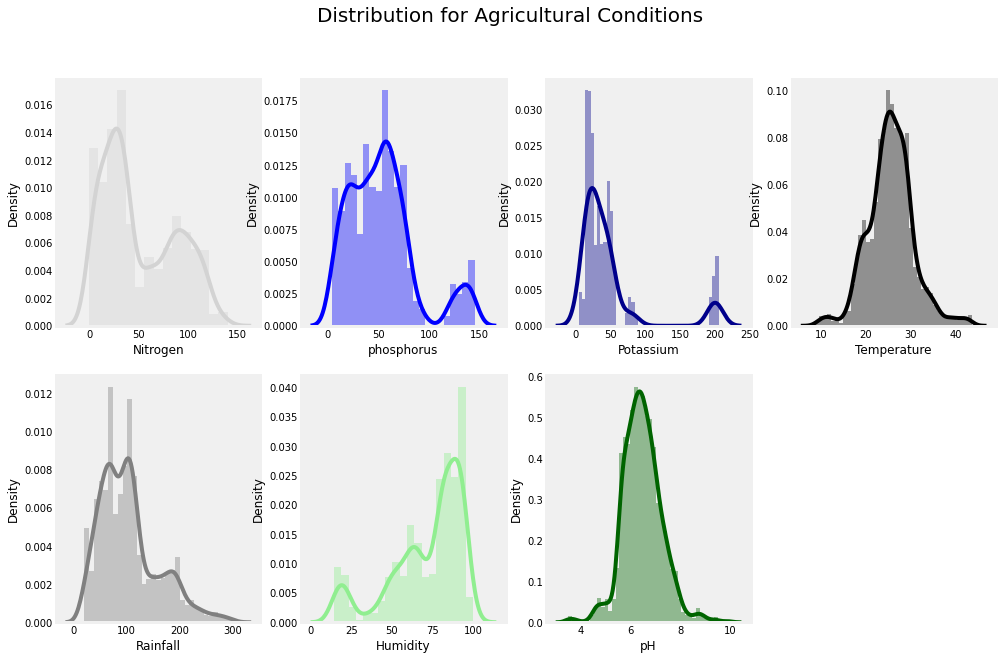

In [10]:
# plot the distribution graph
plt.rcParams['figure.figsize'] = (15,10)

plt.subplot(2, 4, 1)
sns.distplot(data['N'], color = 'lightgrey')
plt.xlabel("Nitrogen", fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'], color = 'blue')
plt.xlabel("phosphorus", fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['K'], color = 'darkblue')
plt.xlabel("Potassium", fontsize = 12)
plt.grid()


plt.subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel("Temperature", fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel("Rainfall", fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel("Humidity", fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel("pH", fontsize = 12)
plt.grid()

plt.suptitle("Distribution for Agricultural Conditions", fontsize = 20)
plt.show()

## Distribution Graph
From the distribution graph above, we can conclude that the distribution of **Potassium** is right-skewed, **Rainfall** is left-skewed and the other conditions are normally distributed.

# Analyzing Agricultural Conditions

In [11]:
print("Crops that requires very High Ratio of Nitrogen Content", data[data["N"] > 120]["label"].unique())
print("Crops that requires very High Ratio of Phosphorous Content", data[data["P"] > 100]["label"].unique())
print("Crops that requires very High Ratio of Potassium Content", data[data["K"] > 200]["label"].unique())
print("Crops that requires very High Rainfall", data[data["rainfall"] > 200]["label"].unique())
print("Crops that requires very Low Temperature", data[data["temperature"] < 10]["label"].unique())
print("Crops that requires very High Temperature", data[data["temperature"] > 40]["label"].unique())
print("Crops that requires very Low Humidity", data[data["humidity"] < 20]["label"].unique())
print("Crops that requires very Low pH", data[data["ph"] < 4]["label"].unique())
print("Crops that requires very High pH", data[data["ph"] > 9]["label"].unique())

Crops that requires very High Ratio of Nitrogen Content ['cotton']
Crops that requires very High Ratio of Phosphorous Content ['grapes' 'apple']
Crops that requires very High Ratio of Potassium Content ['grapes' 'apple']
Crops that requires very High Rainfall ['rice' 'papaya' 'coconut']
Crops that requires very Low Temperature ['grapes']
Crops that requires very High Temperature ['grapes' 'papaya']
Crops that requires very Low Humidity ['chickpea' 'kidneybeans']
Crops that requires very Low pH ['mothbeans']
Crops that requires very High pH ['mothbeans']


In [12]:
# check which crops can be grown during different season
print("Summer Crops")
print(data[(data["temperature"] > 30) & (data["humidity"] > 50)]['label'].unique())
print("-----------------------")
print("Winter Crops")
print(data[(data["temperature"] < 20) & (data["humidity"] > 30)]['label'].unique())
print("-----------------------")
print("Rainy Crops")
print(data[(data["rainfall"] > 200) & (data["humidity"] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------
Rainy Crops
['rice' 'papaya' 'coconut']


# Clustering Similar Crops

In [13]:
import warnings
warnings.filterwarnings('ignore')

x = data.loc[:, ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']].values
print(x.shape)

x_data = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


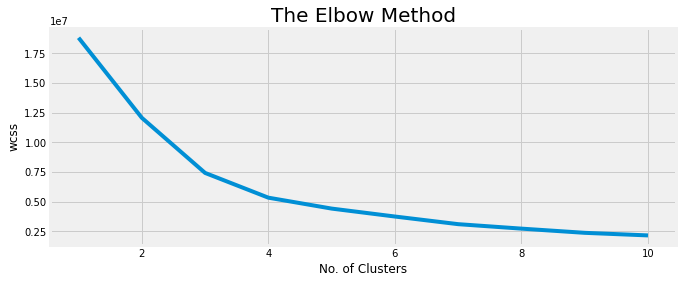

In [14]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
# based on the Elbow Method Graph, we choose K = 4

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

In [16]:
z

,cluster,label
0,3,rice
1,3,rice
2,3,rice
3,3,rice
4,3,rice
...,...,...
2195,3,coffee
2196,2,coffee
2197,3,coffee
2198,2,coffee


In [17]:
print("Cluster 1", z[z['cluster'] == 0]['label'].unique())
print("Cluster 2", z[z['cluster'] == 1]['label'].unique())
print("Cluster 3", z[z['cluster'] == 2]['label'].unique())
print("Cluster 4", z[z['cluster'] == 3]['label'].unique())

Cluster 1 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Cluster 2 ['grapes' 'apple']
Cluster 3 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Cluster 4 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [18]:
# as some crops belongs to multiple cluster (soft clustering)
# we perform hard clustering where a crop that has more than 50
# of belonging to the same cluster, then it is completely belongs to that cluster 

print("Hard Clustering")
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cluster 1", list(d.index))

counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cluster 2", list(d.index))

counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cluster 3", list(d.index))

counts = z[z['cluster'] == 3]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cluster 4", list(d.index))

Hard Clustering
Cluster 1 ['kidneybeans', 'chickpea', 'pomegranate', 'mango', 'lentil', 'orange', 'mungbean', 'blackgram', 'mothbeans']
Cluster 2 ['apple', 'grapes']
Cluster 3 ['watermelon', 'maize', 'muskmelon', 'cotton', 'banana']
Cluster 4 ['pigeonpeas', 'jute', 'coconut', 'papaya', 'rice', 'coffee']


# Visualizing the Hidden Patterns

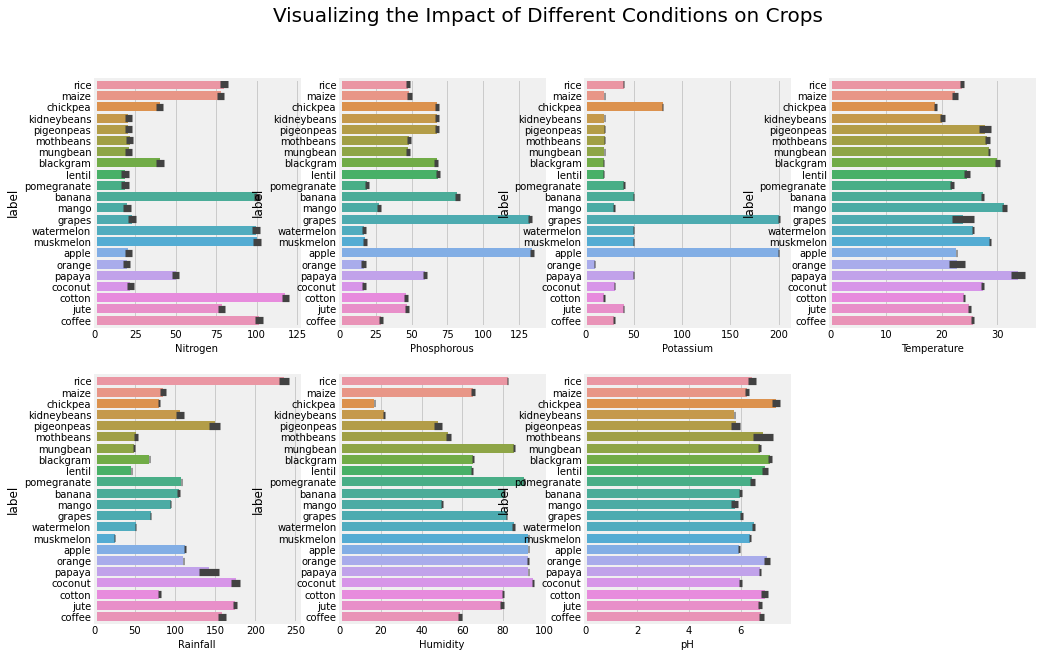

In [19]:
# plot the distribution graph
plt.rcParams['figure.figsize'] = (15,10)

plt.subplot(2, 4, 1)
sns.barplot(data['N'], data['label'])
plt.xlabel("Nitrogen", fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(data['P'], data['label'])
plt.xlabel("Phosphorous", fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(data['K'], data['label'])
plt.xlabel("Potassium", fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(data['temperature'], data['label'])
plt.xlabel("Temperature", fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(data['rainfall'], data['label'])
plt.xlabel("Rainfall", fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(data['humidity'], data['label'])
plt.xlabel("Humidity", fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(data['ph'], data['label'])
plt.xlabel("pH", fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle("Visualizing the Impact of Different Conditions on Crops", fontsize = 20)
plt.show()

# Building ML Classification Model

In [20]:
y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x", x.shape)
print("Shape of y", y.shape)

Shape of x (2200, 7)
Shape of y (2200,)


In [21]:
# splitting the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape x_train: ", x_train.shape)
print("Shape x_test: ", x_test.shape)
print("Shape y_train: ", y_train.shape)
print("Shape y_test: ", y_test.shape)

Shape x_train:  (1760, 7)
Shape x_test:  (440, 7)
Shape y_train:  (1760,)
Shape y_test:  (440,)


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

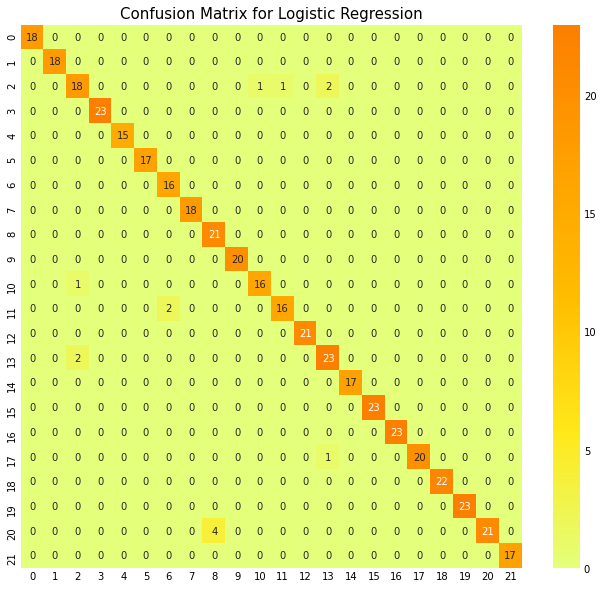

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [23]:
# evaluate model's performance
from sklearn.metrics import classification_report, confusion_matrix

# print confusion matrix
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title("Confusion Matrix for Logistic Regression", fontsize = 15)
plt.show()

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Real Time Predictions

In [24]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
prediction = model.predict((np.array([[90, 40, 40, 20, 80, 7, 200]])))
print("Suitable Crop is", prediction)

Suitable Crop is ['rice']


In [27]:
data[data['label'] == 'orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.781442,92.510777,6.354007,119.035002,orange
1601,37,6,13,26.030973,91.508193,7.511755,101.284774,orange
1602,27,13,6,13.360506,91.356082,7.335158,111.226688,orange
1603,7,16,9,18.879577,92.043045,7.813917,114.665951,orange
1604,20,7,9,29.477417,91.578029,7.129137,111.172750,orange


In [28]:
prediction = model.predict((np.array([[20, 30, 10, 15, 90, 7.5, 100]])))
print("Suitable Crop is", prediction)

Suitable Crop is ['orange']
